In [19]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Cargar el dataset
data = pd.read_csv("emotions_dataset.csv")

In [12]:
# Análisis inicial
print(data.head())  # Vista rápida de los datos
print(data['label'].value_counts())  # Distribución de etiquetas

print(f'The Shape Of Data Is : {data.shape}') # Forma de los datos
data.isnull().sum()  # Verificar valores nulos

data.duplicated().sum()  # Verificar valores duplicados


   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64
The Shape Of Data Is : (416809, 3)


0

In [13]:
# Renombrar columnas
data = data.rename(columns={"text": "Texto", "label": "Emocion"})
# Borrando columna de index
data.drop('Unnamed: 0', axis=1)



data.head() # Vista rápida de los datos

data_aux = data.copy()  # Copia de seguridad

# Renombrar las emociones {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
data_aux['Emocion'] = data_aux['Emocion'].replace({0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'})


C:\Users\diego\AppData\Local\Temp\ipykernel_4304\1417295419.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=ax[1], palette=palette)


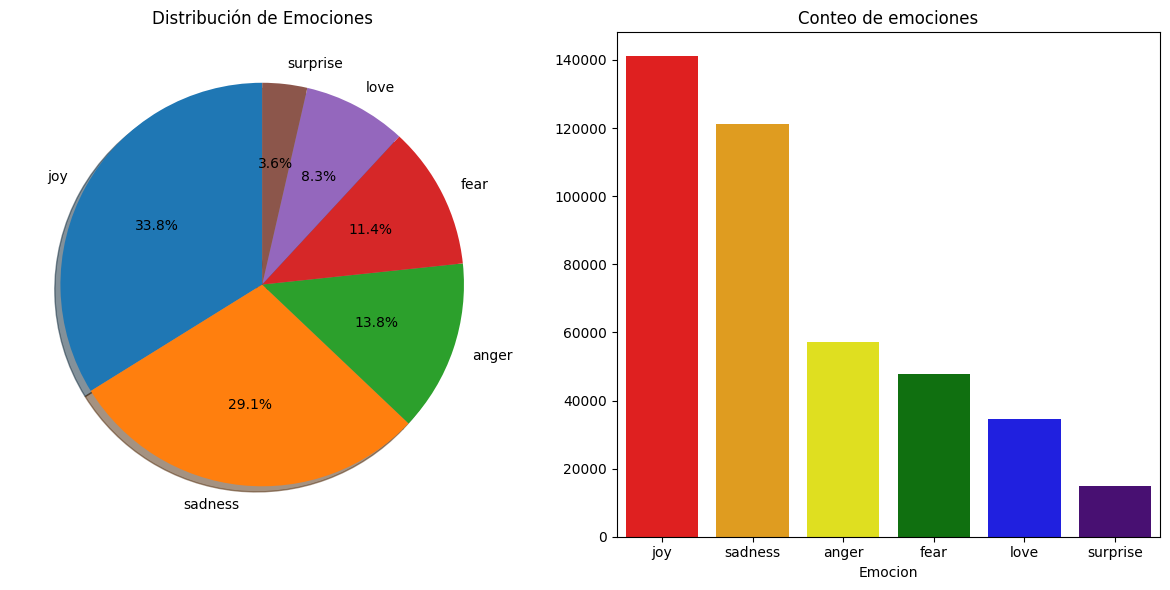

In [14]:
# Analisis Grafico
count = data_aux['Emocion'].value_counts()

# Crear columna con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Grafico de barras
palette = ["#FF0000", "#FFA500", "#FFFF00", "#008000", "#0000FF", "#4B0082"]
sns.set_palette(palette)
ax[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, shadow=True)
ax[0].set_title('Distribución de Emociones')

sns.barplot(x=count.index, y=count.values, ax=ax[1], palette=palette)
ax[1].set_title('Conteo de emociones')

plt.tight_layout()
plt.show()

In [15]:
# Separa el data set para visualizar las emociones
sadness = data_aux[data_aux['Emocion'] == 'sadness']
joy = data_aux[data_aux['Emocion'] == 'joy']
love = data_aux[data_aux['Emocion'] == 'love']
anger = data_aux[data_aux['Emocion'] == 'anger']
fear = data_aux[data_aux['Emocion'] == 'fear']
surprise = data_aux[data_aux['Emocion'] == 'surprise']

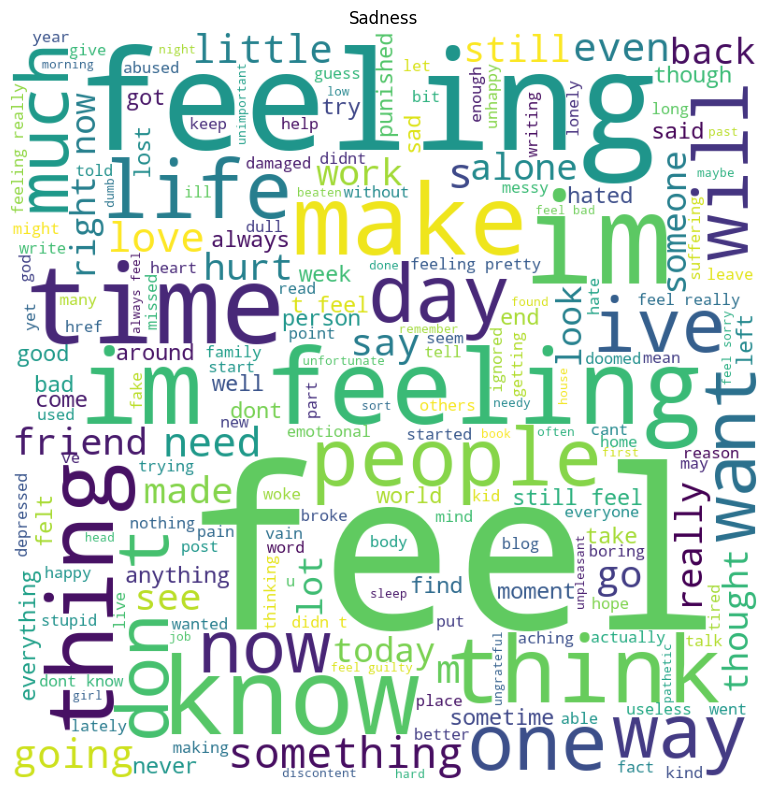

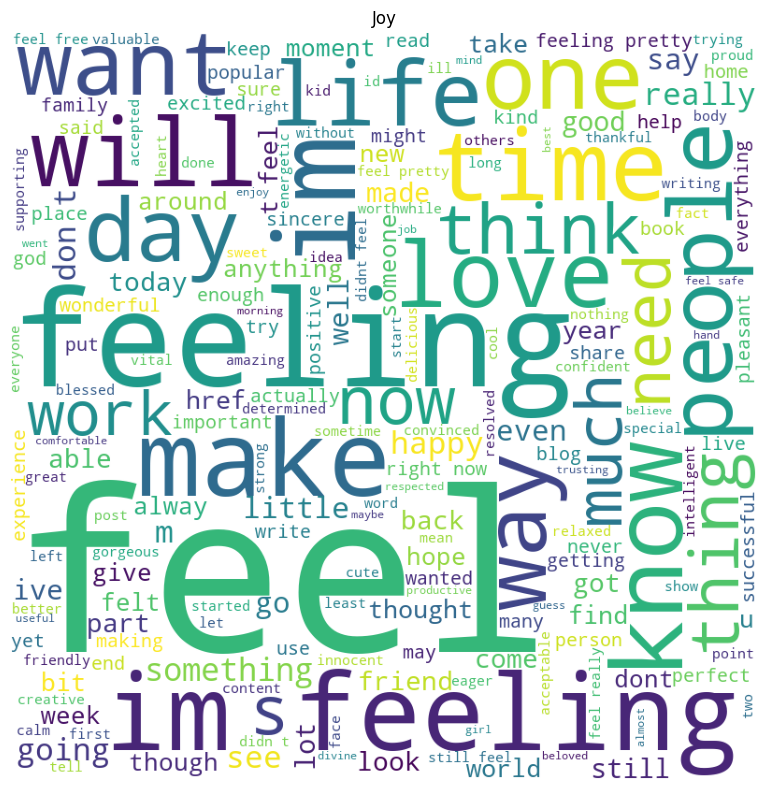

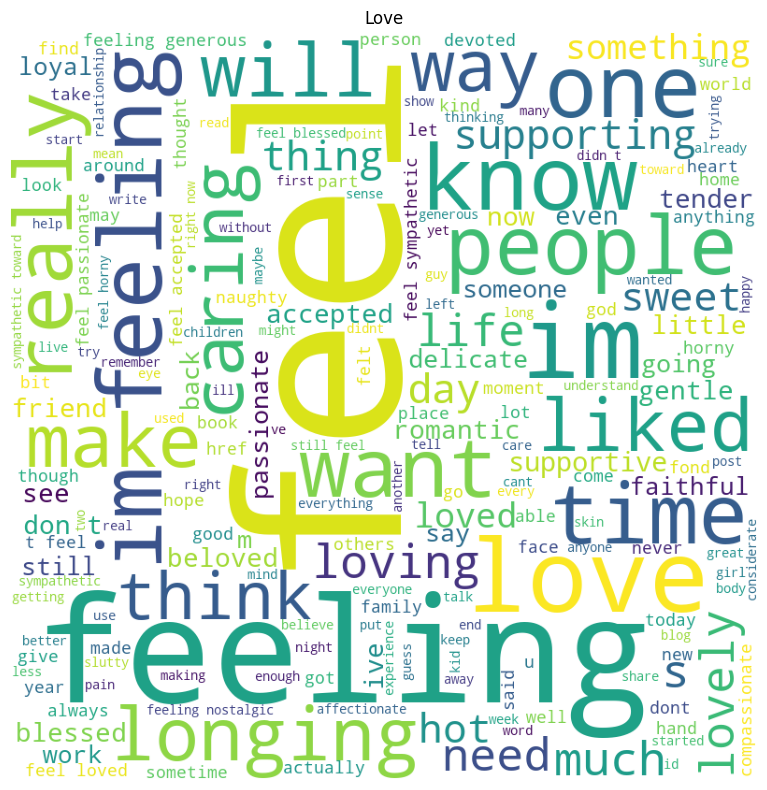

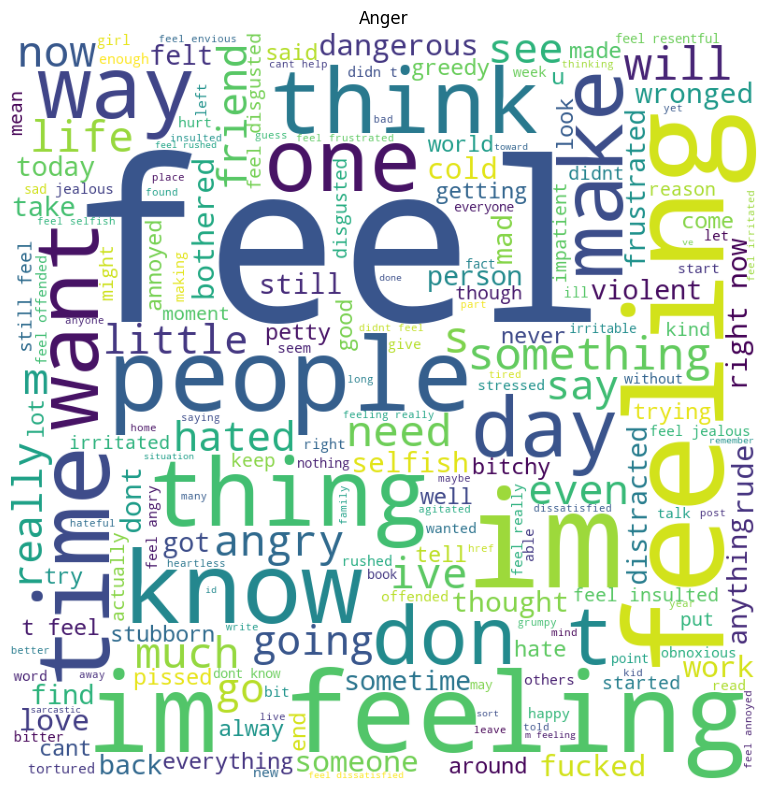

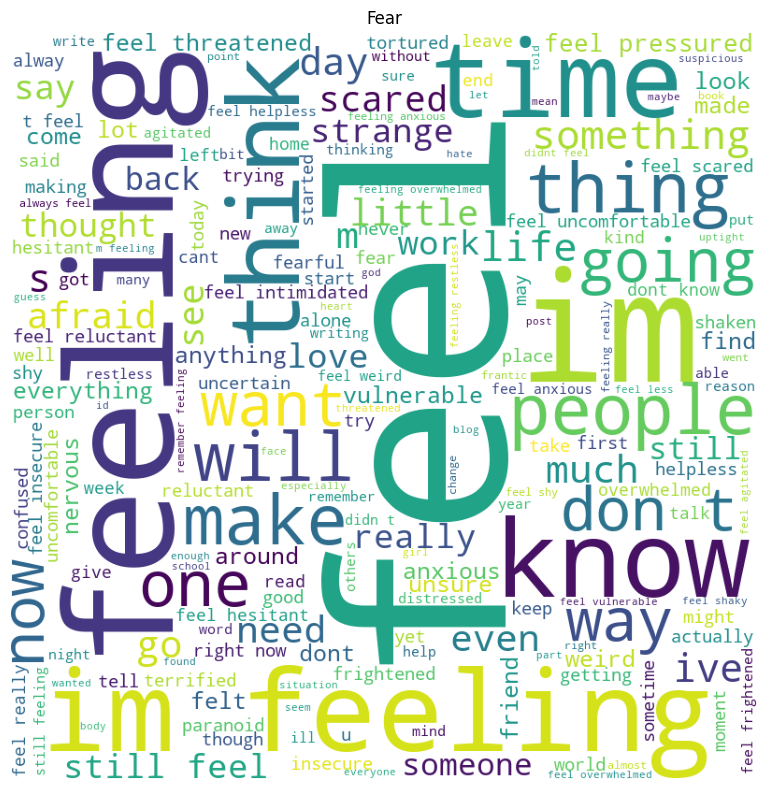

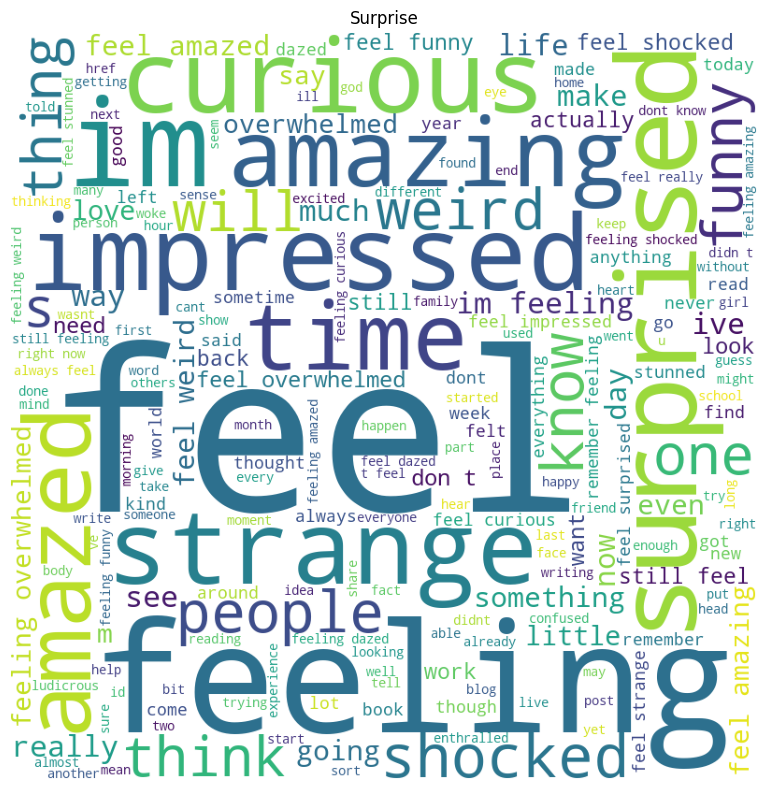

In [16]:
# Crear wordclouds
def wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(data['Texto']))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
wordcloud(sadness, 'Sadness')
wordcloud(joy, 'Joy')
wordcloud(love, 'Love')
wordcloud(anger, 'Anger')
wordcloud(fear, 'Fear')
wordcloud(surprise, 'Surprise')

In [22]:
# Preprocesamiento de Texto
import contractions
# Configuración de palabras vacías (stopwords)
stop_words = set(stopwords.words('english')) - {"not", "no", "never"}  # Conservar palabras negativas importantes

# Lematizador
lemmatizer = WordNetLemmatizer()

# Función de preprocesamiento
def preprocess_text(text):
    # Expansión de contracciones
    text = contractions.fix(text)  # "don't" -> "do not", "i'm" -> "i am"
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    
    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    
    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Eliminar espacios adicionales
    text = re.sub(r'\s+', ' ', text)
    
    # Tokenizar texto
    tokens = word_tokenize(text)
    
    # Lematizar y eliminar palabras vacías
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Reconstruir texto
    return ' '.join(tokens)

# Aplicar preprocesamiento al dataset
data['clean_text'] = data['Texto'].apply(preprocess_text)

# Mostrar resultados preprocesados
print(data.head())

   Unnamed: 0                                              Texto  Emocion  \
0           0      i just feel really helpless and heavy hearted        4   
1           1  ive enjoyed being able to slouch about relax a...        0   
2           2  i gave up my internship with the dmrg and am f...        4   
3           3                         i dont know i feel so lost        0   
4           4  i am a kindergarten teacher and i am thoroughl...        4   

                                          clean_text  
0                 feel really helpless heavy hearted  
1  enjoyed able slouch relax unwind frankly neede...  
2            gave internship dmrg feeling distraught  
3                                 not know feel lost  
4  kindergarten teacher thoroughly weary job take...  
